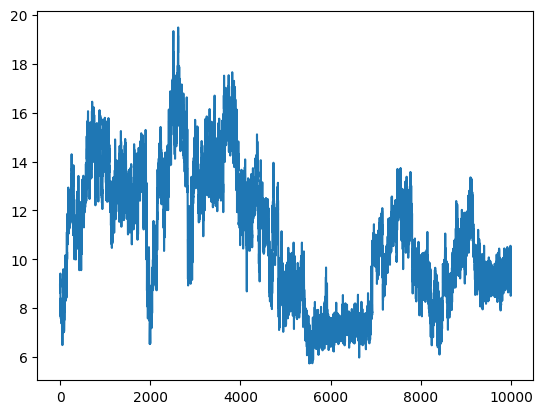

In [1]:
# from last file (multifile) we import the data csv

import os
import numpy
import matplotlib.pyplot as plt # we want to graph some plots (and not write out matplotlib.pyplot each time)

distance_file = os.path.join('data', 'distance_data_headers.csv')
distances = numpy.genfromtxt(fname=distance_file, delimiter=',', dtype='unicode')
headers = distances[0]
data = distances[1:]
data = data.astype(numpy.single)

plt.figure() # figure initialization
plt.plot(data[:,1]) # all the data from a row


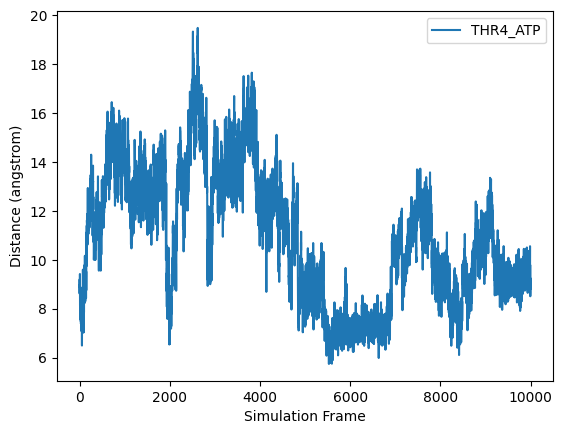

In [2]:
# now, we're going to label our axes and give a legend to our figure

sample = headers[1] # this'll be the label name

plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
fig_1 = plt.plot(data[:,1], label=sample)
plt.legend()

plt.savefig(F'{sample}.png', dpi=300) # dpi sets the image quality for the plot

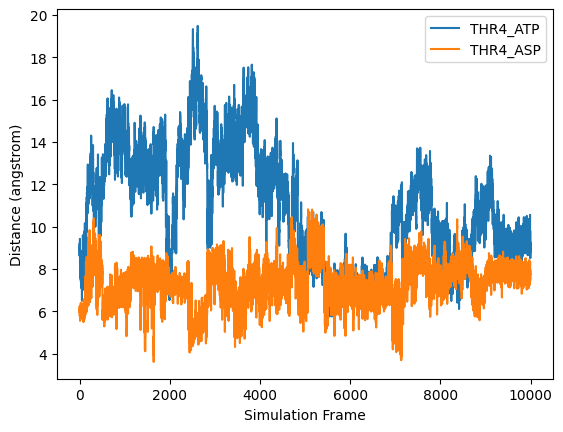

In [3]:
# now lets do multiple sets of data on one plot

plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
plt.plot(data[:,1], label=headers[1])
plt.plot(data[:,2], label=headers[2])
plt.legend()
plt.savefig('two_samples.png')

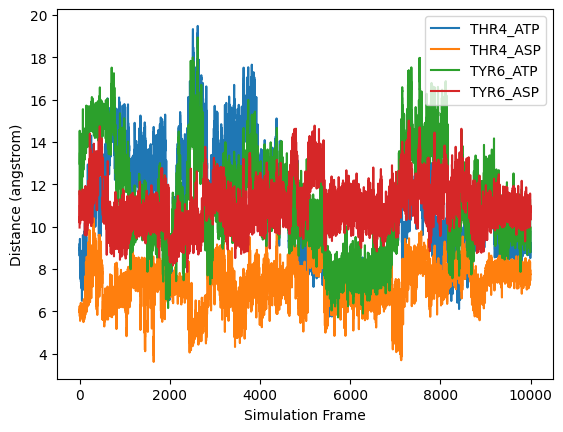

In [4]:
# and a for loop for all the data we have

for col in range(1, len(headers)):
    fig = plt.plot(data[:,col], label=headers[col])
    plt.legend()

plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
plt.savefig('all_samples.png')

In [6]:
# ok, but what if we want all the data on different plots?
# lets modify our for loop to adjust for this

for col in range(1, len(headers)):
    sample = headers[col]
    fig = plt.plot(data[:,col], label=sample)
    plt.legend()
    plt.xlabel('Simulation Frame')
    plt.ylabel('Distance (angstrom)')
    plt.savefig(F'{sample}.png')
    plt.clf() # this keeps the plots from layering on each other

<Figure size 640x480 with 0 Axes>

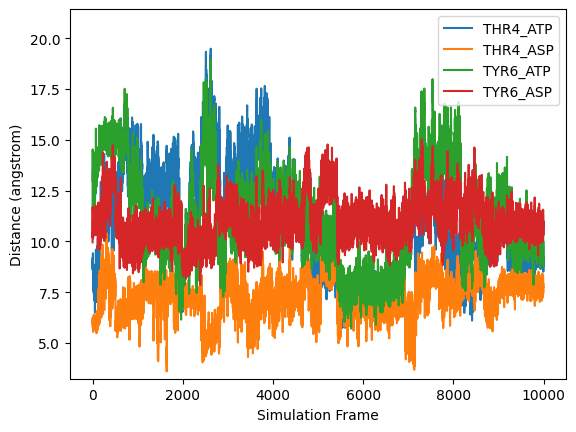

In [7]:
# something to keep in mind for later is we can set plt limits thru plt.ylim and plt.xlim
# so doing something like data_min = numpy.min(data[:, 1:]) and data_max = "".max is useful

data_min = numpy.min(data[:,1:])*0.9
data_max = numpy.max(data[:,1:])*1.1

for col in range(1, len(headers)):
    sample = headers[col]
    fig = plt.plot(data[:,col], label=sample)
    plt.ylim(data_min, data_max)
    plt.legend()
    plt.xlabel('Simulation Frame')
    plt.ylabel('Distance (angstrom)')
    plt.savefig(F'{sample}2.png') # these will layer


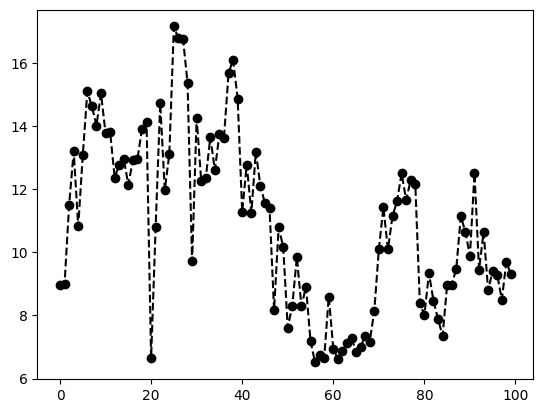

In [8]:
plt.figure()
plt.plot(data[:,0], data[:,1]) # no change to the graph
# but what if we want every 100th point?
plt.clf()
plt.plot(data[0::100,1]) # there it is
# we can customize our graph by making it dashed ('--') or a scatterplot ('o') or comebine them however (eg. '--o')
# we can also change color (goes in the style customization at start or end, no space)
plt.clf()
plt.plot(data[0::100,1],'k--o')

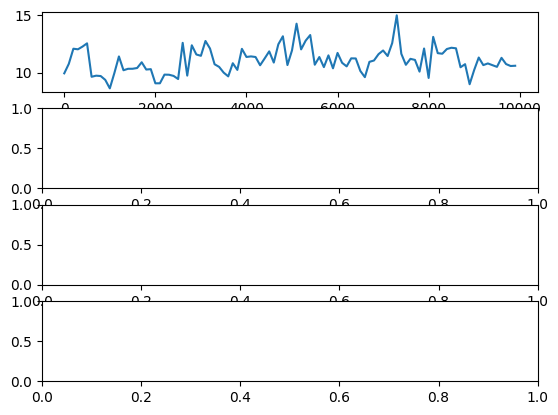

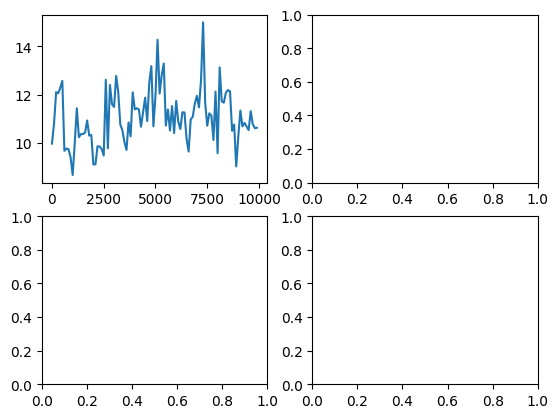

In [9]:
# if we want subplots, we use fig, ax = plt.sbuplots(nrows, ncolumns)
fig, ax = plt.subplots(len(headers)-1,1) # 4 rows, 1 column
fig2, ax2 = plt.subplots(2,2)
# add data to plots using ax[n].plot(data[whatever...]), then look at it using fig
ax[0].plot(data[0::100,0], data[0::100,col]) # the 4x1
ax2[0,0].plot(data[0::100,0], data[0::100,col]) # the 2x2

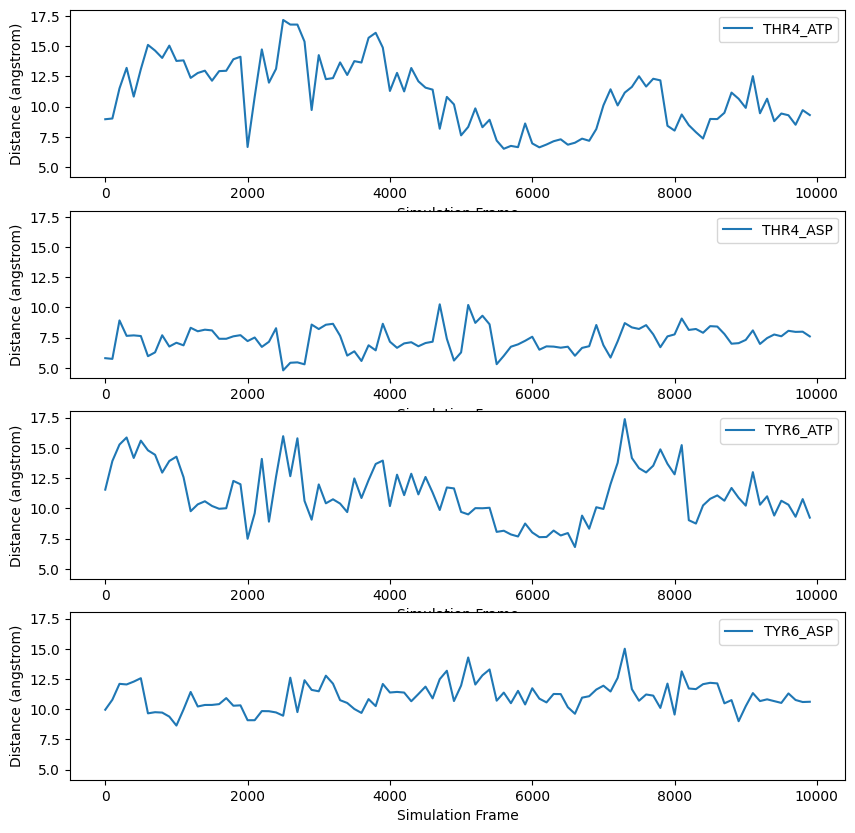

In [10]:
# now lets apply a for loop to add all our data to fig
# we will also set figure size via figsize, and share the y axis via sharey = True

fig, ax = plt.subplots(len(headers)-1, 1, figsize=(10,10), sharey=True) # 4 rows, 1 column

for col in range(1,len(headers)):
    sample = headers[col]
    
    ax[col-1].plot(data[0::100,0], data[0::100,col], label=sample)
    ax[col-1].set_xlabel('Simulation Frame')
    ax[col-1].set_ylabel('Distance (angstrom)')
    ax[col-1].legend()

In [12]:
# time for functions
# syntax
# def function_name(parameters):
    # body code
    # return val
# let's attempt to apply this to our geometric analysis project
# this is what we came up with

import numpy
import os

file_location = os.path.join('data', 'water.xyz')
xyz_file = numpy.genfromtxt(fname=file_location, skip_header=2, dtype='unicode')
symbols = xyz_file[:, 0]
coordinates = xyz_file[:, 1:]
coordinates = coordinates.astype(numpy.single)
num_atoms = len(symbols)
for num1 in range(0, num_atoms):
    for num2 in range(0, num_atoms):
        if num1 < num2:
            x_distance = coordinates[num1, 0] - coordinates[num2, 0]
            y_distance = coordinates[num1, 1] - coordinates[num2, 1]
            z_distance = coordinates[num1, 2] - coordinates[num2, 2]
            bond_length_12 = numpy.sqrt(x_distance ** 2 + y_distance ** 2 + z_distance ** 2)
            if bond_length_12 > 0 and bond_length_12 <= 1.5:
                print(F'{symbols[num1]} to {symbols[num2]} : {bond_length_12:.3f}')

O to H1 : 0.969
O to H2 : 0.969


In [13]:
# ok, but we can simplify now that we know functions
# as we can see, the results are the same

def calc_dist(atom1_coord, atom2_coord):
    x_dist = atom1_coord[0]-atom2_coord[0]
    y_dist = atom1_coord[1]-atom2_coord[1]
    z_dist = atom1_coord[2]-atom2_coord[2]
    bond_len_12 = numpy.sqrt(x_dist**2 + y_dist**2 + z_dist**2)
    return bond_len_12
for num1 in range(0, num_atoms):
    for num2 in range(0, num_atoms):
        if num1 < num2:
            bond_len_12 = calc_dist(coordinates[num1], coordinates[num2])
            if bond_len_12 > 0 and bond_len_12 <= 1.5:
                print(F'{symbols[num1]} to {symbols[num2]} : {bond_len_12:.3f}')

O to H1 : 0.969
O to H2 : 0.969


In [14]:
# now another function - is our atom_distance between a min and max defined by the user?

def bond_check(atom_distance, min_length, max_length):
    if atom_distance > min_length and atom_distance <= max_length:
        return True
    else:
        return False

In [17]:
# if we were to do help(bond_check) nothing would come up because we haven't written documentation for it
# we can add documentation to a function using """text here""" syntax - this is good practice
# we can also add default parameters to parameters that the user does not assign

def bond_check(atom_distance, min_length=0, max_length=1.5):
    """Checks if a distance is a bond based on minimum and maximum bond lengths"""
    if atom_distance > min_length and atom_distance <= max_length:
        return True
    else:
        return False
print(bond_check(0.9)) # should be true
print(bond_check(1.5)) # true
print(bond_check(1.9)) # false
print(bond_check(1.55, max_length=1.6)) # now since we've set max_length ourselves, should be true

True
True
False
True


In [18]:
# now, using bond check in our for loop

num_atoms = len(symbols)
for num1 in range(0, num_atoms):
    for num2 in range(0, num_atoms):
        if num1 < num2:
            bond_len_12 = calc_dist(coordinates[num1], coordinates[num2])
            if bond_check(bond_len_12) is True:
                print(F'{symbols[num1]} to {symbols[num2]} : {bond_len_12:.3f}')

O to H1 : 0.969
O to H2 : 0.969


In [19]:
# lets write a function that opens the xyz file for us and returns the symbols and coordinates

def open_xyz(filename):
    xyz_file = numpy.genfromtxt(fname = filename, skip_header = 2, dtype = 'unicode')
    symbols = xyz_file[:,0]
    coord = (xyz_file[:,1:])
    coord = coord.astype(numpy.single)
    return symbols, coord

In [20]:
# putting it all together

import numpy
import os

file_location = os.path.join('data','water.xyz')
symbols, coord = open_xyz(file_location)
num_atoms = len(symbols)
for num1 in range(0, num_atoms):
    for num2 in range(0, num_atoms):
        if num1 < num2:
            bond_len_12 = calc_dist(coordinates[num1], coordinates[num2])
            if bond_check(bond_len_12) is True:
                print(F'{symbols[num1]} to {symbols[num2]} : {bond_len_12:.3f}')

O to H1 : 0.969
O to H2 : 0.969


In [21]:
# we can nest our functions!
def print_bonds(atom_symbols, atom_coordinates):
    num_atoms = len(atom_symbols)
    for num1 in range(0, num_atoms):
        for num2 in range(0, num_atoms):
            if num1 < num2:
                bond_len_12 = calc_dist(coordinates[num1], coordinates[num2])
                if bond_check(bond_len_12) is True:
                    print(F'{atom_symbols[num1]} to {atom_symbols[num2]} : {bond_len_12:.3f}')

In [24]:
# now lets put all our functions in a cell and document them

def calc_dist(atom1_coord, atom2_coord):
    """Calculates the distance between points in 3d space."""
    x_dist = atom1_coord[0]-atom2_coord[0]
    y_dist = atom1_coord[1]-atom2_coord[1]
    z_dist = atom1_coord[2]-atom2_coord[2]
    bond_len_12 = numpy.sqrt(x_dist**2 + y_dist**2 + z_dist**2)
    return bond_len_12

def bond_check(atom_distance, min_length=0, max_length=1.5):
    """Checks if a distance is a bond based on minimum and maximum bond lengths."""
    if atom_distance > min_length and atom_distance <= max_length:
        return True
    else:
        return False

def open_xyz(filename):
    """Opens, reads xyz file. Outputs a tuple of symbols and coordinates."""
    xyz_file = numpy.genfromtxt(fname = filename, skip_header = 2, dtype = 'unicode')
    symbols = xyz_file[:,0]
    coord = (xyz_file[:,1:])
    coord = coord.astype(numpy.single)
    return symbols, coord

def print_bonds(atom_symbols, atom_coordinates):
    """Prints atom symbols and bond length for a set of atoms."""
    num_atoms = len(atom_symbols)
    for num1 in range(0, num_atoms):
        for num2 in range(0, num_atoms):
            if num1 < num2:
                bond_len_12 = calc_dist(atom_coordinates[num1], atom_coordinates[num2])
                if bond_check(bond_len_12) is True:
                    print(F'{atom_symbols[num1]} to {atom_symbols[num2]} : {bond_len_12:.3f}')

In [25]:
# we can now work with any arbitrary .xyz file (so long as the format doesn't change)

water_file_location = os.path.join('data', 'water.xyz')
water_symbols, water_coords = open_xyz(water_file_location)

benzene_file_location = os.path.join('data', 'benzene.xyz')
benzene_symbols, benzene_coords = open_xyz(benzene_file_location)

print(F'Printing bonds for water.')
print_bonds(water_symbols, water_coords)

print(F'Printing bonds for benzene.')
print_bonds(benzene_symbols, benzene_coords)

Printing bonds for water.
O to H1 : 0.969
O to H2 : 0.969
Printing bonds for benzene.
C to H : 1.088
C to C : 1.403
C to C : 1.403
C to H : 1.088
C to C : 1.403
C to H : 1.088
C to C : 1.403
C to H : 1.088
C to C : 1.403
C to H : 1.088
C to C : 1.403
C to H : 1.088


In [26]:
# we can also use glob to generalize this process into a for loop

import glob

xyz_files = glob.glob("data/*.xyz")

for xyz_file in xyz_files:
    atom_symbols, atom_coords = open_xyz(xyz_file)
    print("Printing bonds for ", xyz_file)
    print_bonds(atom_symbols, atom_coords)

Printing bonds for  data\benzene.xyz
C to H : 1.088
C to C : 1.403
C to C : 1.403
C to H : 1.088
C to C : 1.403
C to H : 1.088
C to C : 1.403
C to H : 1.088
C to C : 1.403
C to H : 1.088
C to C : 1.403
C to H : 1.088
Printing bonds for  data\buckminsterfullerene.xyz
C to C : 1.453
C to C : 1.453
C to C : 1.395
C to C : 1.453
C to C : 1.395
C to C : 1.453
C to C : 1.395
C to C : 1.453
C to C : 1.395
C to C : 1.395
C to C : 1.453
C to C : 1.453
C to C : 1.395
C to C : 1.453
C to C : 1.453
C to C : 1.453
C to C : 1.453
C to C : 1.395
C to C : 1.453
C to C : 1.453
C to C : 1.453
C to C : 1.453
C to C : 1.395
C to C : 1.453
C to C : 1.453
C to C : 1.453
C to C : 1.453
C to C : 1.453
C to C : 1.395
C to C : 1.453
C to C : 1.395
C to C : 1.395
C to C : 1.453
C to C : 1.453
C to C : 1.395
C to C : 1.453
C to C : 1.453
C to C : 1.395
C to C : 1.453
C to C : 1.453
C to C : 1.395
C to C : 1.453
C to C : 1.453
C to C : 1.395
C to C : 1.453
C to C : 1.453
C to C : 1.395
C to C : 1.453
C to C : 1.45